# Loan Application Status Prediction

# Problem Definition

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.  You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# Data Loading and Description

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Profiling

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Preprocessing

In [58]:
df.drop("Gender",axis=1,inplace=True)

In [59]:
df.drop("Married",axis=1,inplace=True)

In [60]:
df.drop("Dependents",axis=1,inplace=True)

In [61]:
df.drop("Self_Employed",axis=1,inplace=True)

In [62]:
df.drop("LoanAmount",axis=1,inplace=True)

In [63]:
df.drop("Loan_Amount_Term",axis=1,inplace=True)

In [64]:
df.drop("Credit_History",axis=1,inplace=True)

In [65]:
df.head()

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0.0,Graduate,5849,0.0,Urban,Y
1,1.0,Graduate,4583,1508.0,Rural,N
2,2.0,Graduate,3000,0.0,Urban,Y
3,3.0,Not Graduate,2583,2358.0,Urban,Y
4,4.0,Graduate,6000,0.0,Urban,Y


In [66]:
df.dtypes

Loan_ID              float64
Education             object
ApplicantIncome        int64
CoapplicantIncome    float64
Property_Area         object
Loan_Status           object
dtype: object

# Making DataFrame for the Nominal Data

In [67]:
df_visualization_nominal=df[['Education','Property_Area','Loan_Status']].copy()

In [68]:
df_visualization_nominal.columns

Index(['Education', 'Property_Area', 'Loan_Status'], dtype='object')

# Visualization of the Data:

In [69]:
import seaborn as sns

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


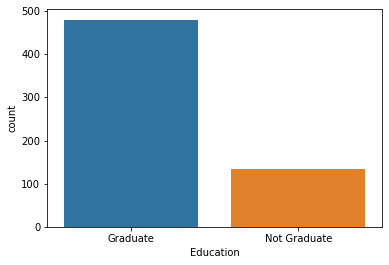

In [20]:
ax = sns.countplot(x="Education", data=df_visualization_nominal)
print(df_visualization_nominal["Education"].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


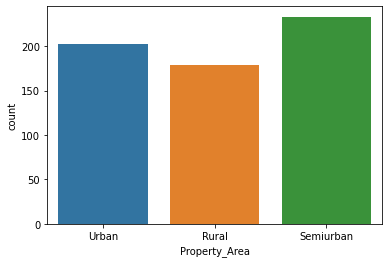

In [24]:
ax = sns.countplot(x="Property_Area", data=df_visualization_nominal)
print(df_visualization_nominal["Property_Area"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


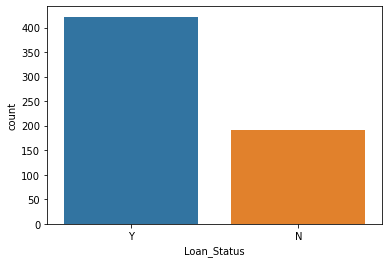

In [25]:
ax = sns.countplot(x="Loan_Status", data=df_visualization_nominal)
print(df_visualization_nominal["Loan_Status"].value_counts())

# Checking the distribution of the continous value of the float type columns

In [70]:
df_visualization_continous=df[["Loan_ID","CoapplicantIncome","ApplicantIncome"]]

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

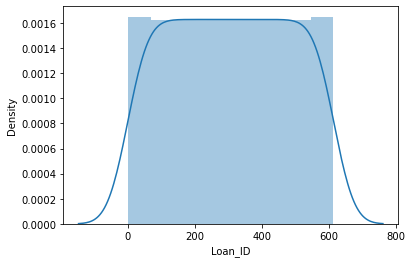

In [73]:
sns.distplot(df_visualization_continous['Loan_ID'],kde=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

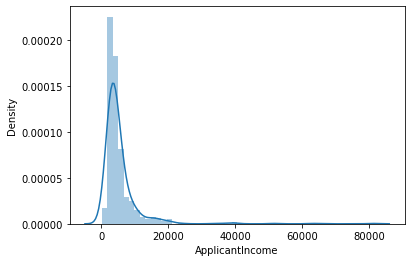

In [71]:
sns.distplot(df_visualization_continous['ApplicantIncome'],kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

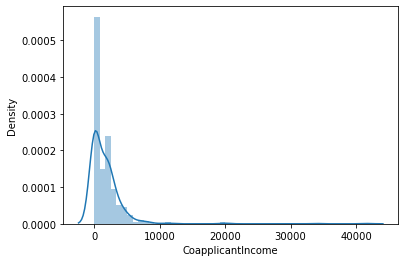

In [72]:
sns.distplot(df_visualization_continous['CoapplicantIncome'],kde=True)

# Encoding of DataFrame:

In [75]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [76]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [77]:
df

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0.0,0.0,5849,0.0,2.0,1.0
1,1.0,0.0,4583,1508.0,0.0,0.0
2,2.0,0.0,3000,0.0,2.0,1.0
3,3.0,1.0,2583,2358.0,2.0,1.0
4,4.0,0.0,6000,0.0,2.0,1.0
...,...,...,...,...,...,...
609,609.0,0.0,2900,0.0,0.0,1.0
610,610.0,0.0,4106,0.0,0.0,1.0
611,611.0,0.0,8072,240.0,2.0,1.0
612,612.0,0.0,7583,0.0,2.0,1.0


# Describe the dataset:

In [78]:
df.describe()

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.218241,5403.459283,1621.245798,1.037459,0.687296
std,177.390811,0.413389,6109.041673,2926.248369,0.787482,0.463973
min,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000
25%,153.250000,0.000000,2877.500000,0.000000,0.000000,0.000000
50%,306.500000,0.000000,3812.500000,1188.500000,1.000000,1.000000
75%,459.750000,0.000000,5795.000000,2297.250000,2.000000,1.000000
max,613.000000,1.000000,81000.000000,41667.000000,2.000000,1.000000


<AxesSubplot:>

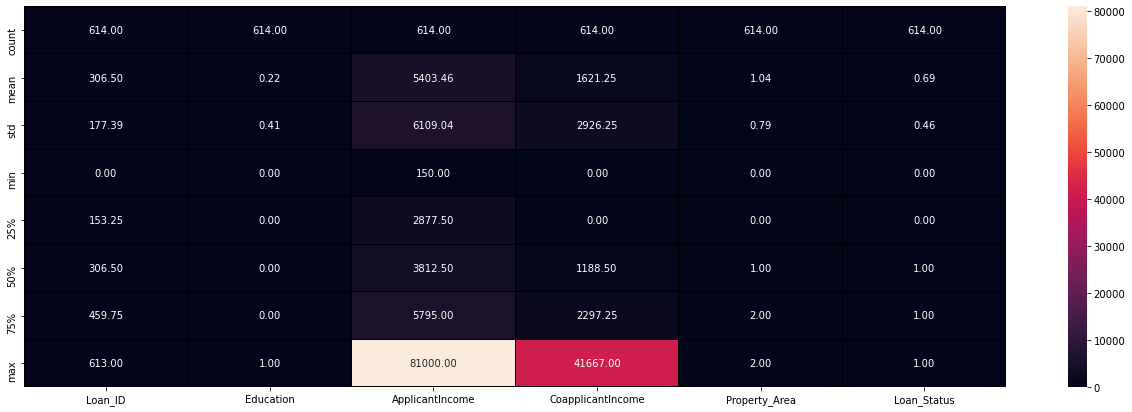

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [80]:
df.corr()

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
Loan_ID,1.000000,0.039442,0.016925,0.039211,-0.155416,0.011773
Education,0.039442,1.000000,-0.140760,-0.062290,-0.065243,-0.085884
ApplicantIncome,0.016925,-0.140760,1.000000,-0.116605,-0.009500,-0.004710
CoapplicantIncome,0.039211,-0.062290,-0.116605,1.000000,0.010522,-0.059187
Property_Area,-0.155416,-0.065243,-0.009500,0.010522,1.000000,0.032112
Loan_Status,0.011773,-0.085884,-0.004710,-0.059187,0.032112,1.000000


<AxesSubplot:>

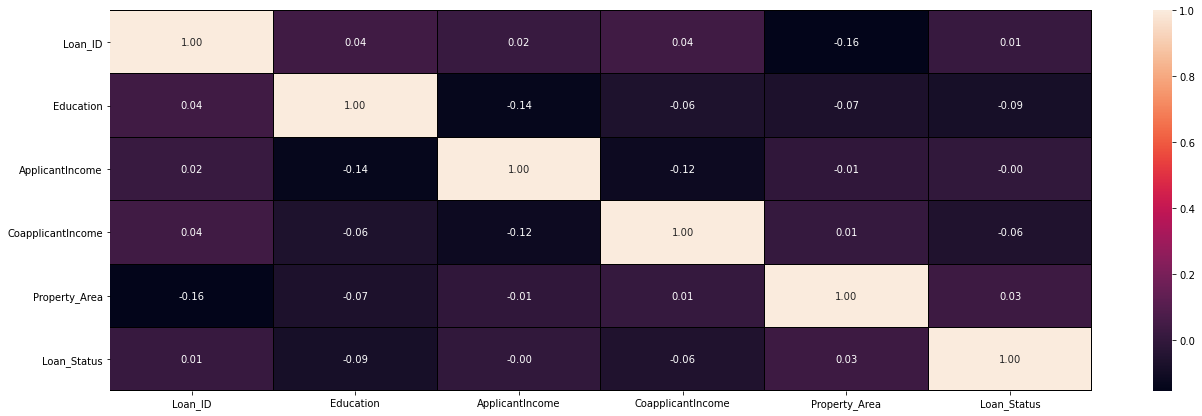

In [81]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

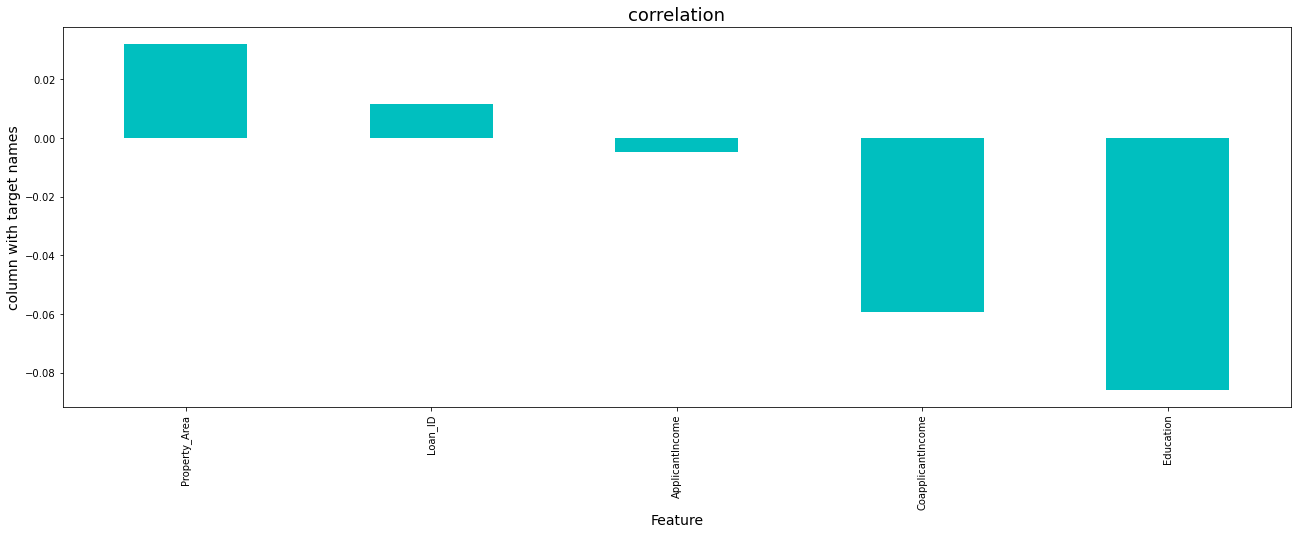

In [82]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [83]:
df.skew()

Loan_ID              0.000000
Education            1.367622
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Outliers Check:

In [84]:
df.dtypes

Loan_ID              float64
Education            float64
ApplicantIncome        int64
CoapplicantIncome    float64
Property_Area        float64
Loan_Status          float64
dtype: object

<AxesSubplot:>

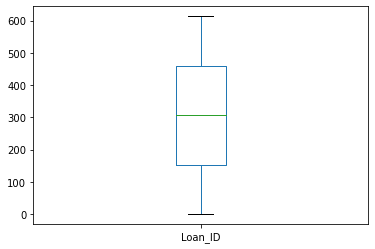

In [85]:
df['Loan_ID'].plot.box()

<AxesSubplot:>

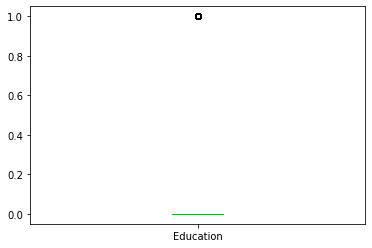

In [86]:
df['Education'].plot.box()

<AxesSubplot:>

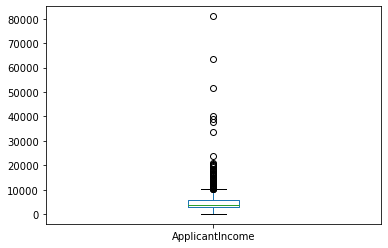

In [87]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

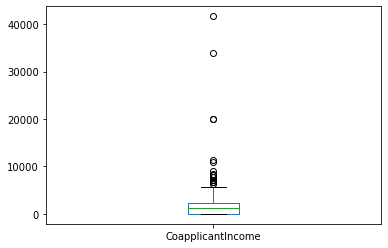

In [88]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

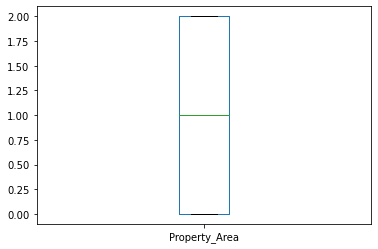

In [89]:
df['Property_Area'].plot.box()

<AxesSubplot:>

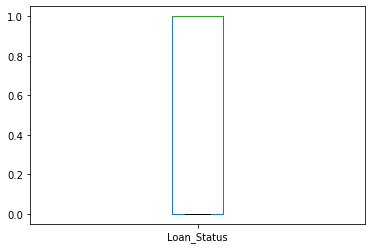

In [90]:
df['Loan_Status'].plot.box()

# Considering the outlier removal

In [91]:
from scipy.stats import zscore
import numpy as np

In [92]:
z=np.abs(zscore(df))
df.shape

(614, 6)

In [93]:
threshold=3
print(np.where(z>3))

(array([  9, 126, 155, 171, 177, 183, 185, 333, 402, 409, 417, 443, 581,
       600], dtype=int64), array([3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3], dtype=int64))


In [94]:
len(np.where(z>3)[0])

14

In [95]:
df_new=df[(z<3)]
df_new

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0.0,0.0,5849,0.0,2.0,1.0
0,0.0,0.0,5849,0.0,2.0,1.0
0,0.0,0.0,5849,0.0,2.0,1.0
0,0.0,0.0,5849,0.0,2.0,1.0
0,0.0,0.0,5849,0.0,2.0,1.0
...,...,...,...,...,...,...
613,613.0,0.0,4583,0.0,1.0,0.0
613,613.0,0.0,4583,0.0,1.0,0.0
613,613.0,0.0,4583,0.0,1.0,0.0
613,613.0,0.0,4583,0.0,1.0,0.0


In [96]:
df_new.shape

(3670, 6)

In [97]:
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe", df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows", df.shape[0]-df_new.shape[0])

Old Dataframe (614, 6)
New Dataframe (600, 6)
total_dropped_rows 14


In [99]:
loss_percent=(614-600)/614*100
loss_percent

2.2801302931596092

# Separating the columns into features and target:

In [101]:
features=df_new.drop("Loan_Status",axis=1)
target=df_new["Loan_Status"]

# Scaling the data using Min-Max Scaler:

In [102]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [103]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the testing accuracy is:- 0.018615357612178474
At random state 0, the testing accuracy is:- -0.02402576488013497


At random state 1, the testing accuracy is:- 0.017732913448263443
At random state 1, the testing accuracy is:- -0.022126105138033036


At random state 2, the testing accuracy is:- 0.023374586226118876
At random state 2, the testing accuracy is:- -0.06706510984364589


At random state 3, the testing accuracy is:- 0.01262866036834942
At random state 3, the testing accuracy is:- -0.006745348199185708


At random state 4, the testing accuracy is:- 0.021872924436969754
At random state 4, the testing accuracy is:- -0.08085596011882301


At random state 5, the testing accuracy is:- 0.016431321672094157
At random state 5, the testing accuracy is:- -0.05185808482867649


At random state 6, the testing accuracy is:- 0.006674951373096816
At random state 6, the testing accuracy is:- -0.00518955625024109


At random state 7, the testing accuracy is:- 0.01583844073700

In [104]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [105]:
lr.fit(features_train,target_train)

LinearRegression()

In [106]:
pred_test=lr.predict(features_test)

In [107]:
print(r2_score(target_test,pred_test))

0.011979352244763986


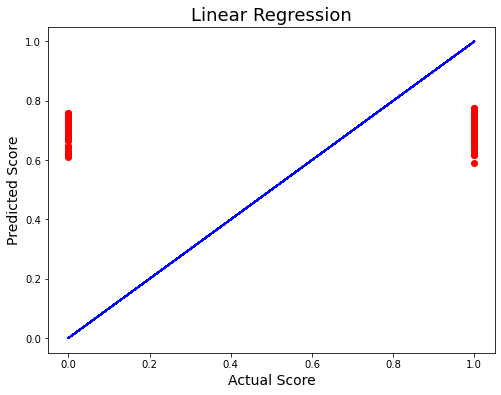

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual Score',fontsize=14)
plt.ylabel('Predicted Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [110]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [111]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lssrf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross val Score:',rfc*100)

-0.011714340559860315

In [112]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.007920376511828042

# Ensemble technique:

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [114]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross val Score:',rfc*100)

R2 Score: -7.214197329859995
Cross val Score: -9.21779212969978


# Model Selection

linear regression

In [118]:
X=df_new.iloc[:,1:14]
y=df_new['Loan_Status']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [120]:
pred=lr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.761191494403622e-16
MSE: 1.355204966440712e-31
RMSE: 3.6813108622346906e-16


# y_test vs predictions

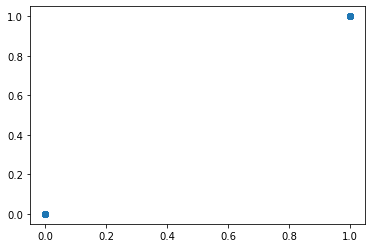

In [121]:
plt.scatter(x=y_test,y=pred)

# Decision Tree Regression Model

In [122]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

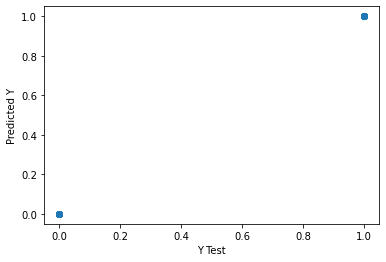

In [123]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [124]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


# Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

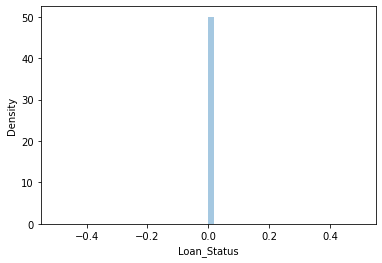

In [127]:
sns.distplot((y_test-pred),bins=50)

# Actual Vs Predicted sample

,Y Test,Pred
111,1.0,1.0
430,1.0,1.0
577,1.0,1.0
78,0.0,0.0
188,1.0,1.0


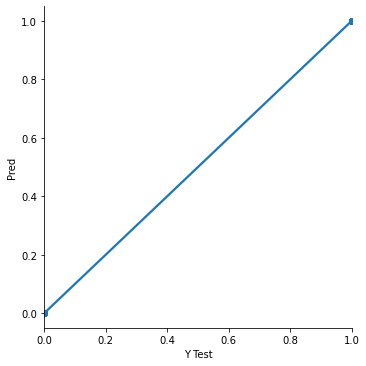

In [129]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Conclusions

learnt about EDA function through Pandas and other plotting libraries.

used matplotlib, plotly and seaborn to develop better insights about the data.

preproceesing helps in dealing with missing values and irregualities present in the data.

Analyzed which model will be work with better accuracy with the help of low residual and RMSE scores.

used Linear, Decision Tree and other applicable and required models to get best predictions.